In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data Cleaning

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Internship_Unified_Mentor/Datasets/Financial Analytics data.csv'
df = pd.read_csv(file_path)

# Inspect column names
print(df.columns)

# Drop unnecessary column if it exists
columns_to_drop = [col for col in df.columns if 'Unnamed' in col]
df_cleaned = df.drop(columns=columns_to_drop)

# Remove rows with missing values in relevant columns
df_cleaned = df_cleaned.dropna(subset=['Mar Cap - Crore', 'Sales Qtr - Crore'])

# Check for missing values in relevant columns
missing_values = df_cleaned.isnull().sum()

print(df_cleaned.head())
print(missing_values)


Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')
   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore
0      1  Reliance Inds.        583436.72           99810.00
1      2             TCS        563709.84           30904.00
2      3       HDFC Bank        482953.59           20581.27
3      4             ITC        320985.27            9772.02
4      5         H D F C        289497.37           16840.51
S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64


##Descriptive Statistics

In [ ]:
# Generate descriptive statistics
desc_stats = df_cleaned.describe()

print(desc_stats)


            S.No.  Mar Cap - Crore  Sales Qtr - Crore
count  365.000000       365.000000         365.000000
mean   250.435616     31300.970301        4395.976849
std    147.106354     67224.641338       11092.206185
min      1.000000      3017.070000          47.240000
25%    133.000000      5089.870000         593.740000
50%    264.000000      9097.330000        1278.300000
75%    363.000000     21372.180000        2840.750000
max    499.000000    583436.720000      110666.930000


##Key Metrics Calculation

In [ ]:
# Total and average market capitalization
total_mar_cap = df_cleaned['Mar Cap - Crore'].sum()
avg_mar_cap = df_cleaned['Mar Cap - Crore'].mean()

# Total and average quarterly sales
total_sales = df_cleaned['Sales Qtr - Crore'].sum()
avg_sales = df_cleaned['Sales Qtr - Crore'].mean()

# Top and bottom companies by Market Capitalization and Quarterly Sales
top_mar_cap = df_cleaned.nlargest(1, 'Mar Cap - Crore')
bottom_mar_cap = df_cleaned.nsmallest(1, 'Mar Cap - Crore')

top_sales = df_cleaned.nlargest(1, 'Sales Qtr - Crore')
bottom_sales = df_cleaned.nsmallest(1, 'Sales Qtr - Crore')

key_metrics = {
    'Total Market Cap': total_mar_cap,
    'Average Market Cap': avg_mar_cap,
    'Top Market Cap Company': top_mar_cap,
    'Bottom Market Cap Company': bottom_mar_cap,
    'Total Quarterly Sales': total_sales,
    'Average Quarterly Sales': avg_sales,
    'Top Sales Company': top_sales,
    'Bottom Sales Company': bottom_sales
}

print(key_metrics)


{'Total Market Cap': 11424854.16, 'Average Market Cap': 31300.970301369864, 'Top Market Cap Company':    S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore
0      1  Reliance Inds.        583436.72            99810.0, 'Bottom Market Cap Company':      S.No.             Name  Mar Cap - Crore  Sales Qtr - Crore
486    499  Natl.Fertilizer          3017.07            2840.75, 'Total Quarterly Sales': 1604531.55, 'Average Quarterly Sales': 4395.976849315069, 'Top Sales Company':     S.No.     Name  Mar Cap - Crore  Sales Qtr - Crore
14     15  I O C L        178017.48          110666.93, 'Bottom Sales Company':      S.No.              Name  Mar Cap - Crore  Sales Qtr - Crore
467    480  Central Dep. Ser          3316.31              47.24}


##Correlation Analysis

In [ ]:
# Correlation between Market Cap and Quarterly Sales
correlation = df_cleaned[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()

print(correlation)


                   Mar Cap - Crore  Sales Qtr - Crore
Mar Cap - Crore           1.000000           0.620702
Sales Qtr - Crore         0.620702           1.000000


##Visualization
Scatter Plot for Market Cap vs. Quarterly Sales

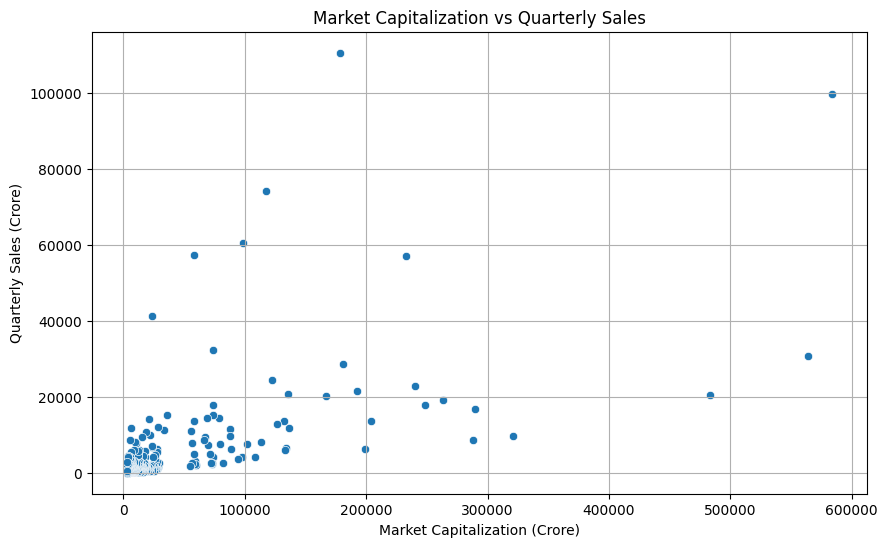

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Market Cap vs. Quarterly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Mar Cap - Crore', y='Sales Qtr - Crore')
plt.title('Market Capitalization vs Quarterly Sales')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.grid(True)
plt.show()


##Heatmap for Correlation

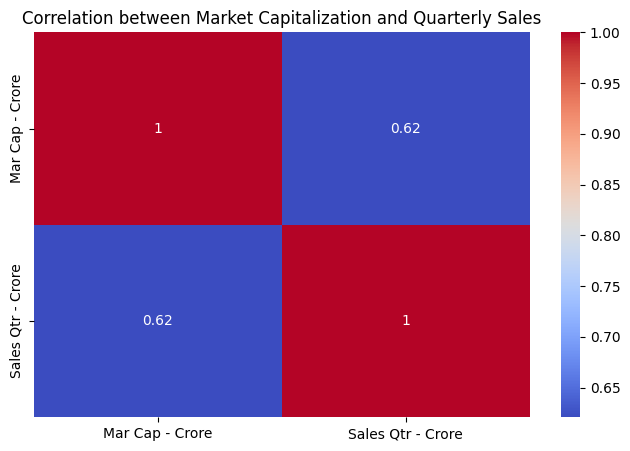

In [ ]:
# Heatmap for Correlation
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Market Capitalization and Quarterly Sales')
plt.show()
